In [1]:
#@title ㅤ
# Source: https://stackoverflow.com/questions/49090476/how-can-i-hide-cell-contents-in-google-colaboratory
from IPython.display import display, HTML

html_content_1 = """<div style="align-items: center; justify-content: center; flex-wrap: wrap;">
<center><br> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Twitter_and_X_logos.svg/485px-Twitter_and_X_logos.svg.png?20230724093320" style="width: 150px;"></center><br>
</div>"""

display(HTML(html_content_1))

html_content_2 = """<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 6rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;margin-left: 8rem;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #24A3F1;">TM Project |</span> <span style="color: #2a2a83;">Stock Market Sentiment Tweets Analysis</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Spring Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>Filipa Pereira, 20240509</div>
            <div>João Henriques, 20240499</div>
            <div>Umeima Mahomed, 20240543</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            Group 37
        </div>
    </div>
</div>"""

display(HTML(html_content_2))

<div style="background: linear-gradient(to right, #24A3F1, #0B62A3, #113d7c, #000000);
            padding: 7px; color: white; border-radius: 500px; text-align: center;">
</div>

## 📚 **Libraries Import**

In [2]:
# # Source to install PyTorch: https://pytorch.org/get-started/locally/
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

# # To install Google Collab
# !pip install --upgrade transformers
# !pip install --upgrade accelerate

# # Solve "WARNING:transformers_modules.microsoft.Phi-3-mini-4k-instruct.modeling_phi3:`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'."
# !pip install flash-attn --no-build-isolation

# # Downgrade numpy to version if necessary
# !pip install numpy==1.26.4
# # Note: Restart the kernel after downgrading numpy to ensure compatibility.

In [3]:
# Imports for System Operations
import os
import sys
import time
import datetime

# Imports for Data Manipulation
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Imports for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from collections import Counter
import itertools

# Imports for Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, \
    precision_score, recall_score, f1_score
from tqdm.notebook import tqdm

# Imports for Transformer Models
import torch
import transformers
# Source: https://huggingface.co/models
from transformers import pipeline, AutoModel, AutoTokenizer, AutoModelForCausalLM

# Disable warnings for the pipeline
# Source: https://huggingface.co/docs/transformers/en/main_classes/logging
from transformers import logging
logging.set_verbosity_error()  # Suppress warnings from the transformers library

In [4]:
!nvidia-smi

Thu Jun 12 21:14:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Source https://github.com/pytorch/torchtune/issues/1185
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

print(transformers.__version__)
print(torch.__version__)

4.52.4
2.6.0+cu124


In [6]:
torch.cuda.empty_cache()  # Clear cache
torch.cuda.is_available() # Check if GPU is available
# (if False in Google Colab: Make sure your Hardware accelerator is set to GPU. | Runtime > Change runtime type > Hardware Accelerator)

# automatically chose CPU or GPU for inference, depending on your hardware
device = torch.cuda.current_device() if torch.cuda.is_available() else -1
# -1 == CPU ; 0 == GPU
print(device)

0


In [7]:
# Auxiliary function to display multiple dataframes side by side
# Source: https://python.plainenglish.io/displaying-multiple-dataframes-side-by-side-in-jupyter-lab-notebook-9a4649a4940
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, super_title, titles=cycle([''])):
    """ Display multiple DataFrames side by side in a Jupyter notebook.
    Args:
        args: Variable number of DataFrame objects to be displayed side by side.
        super_title: The main title to be displayed at the top of the combined view.
        titles: An iterable containing titles for each DataFrame to be displayed. Defaults to an infinite cycle of empty strings.

    Returns:
        None. The function generates and displays HTML content side by side for given DataFrames.
    """
    html_str = ''
    html_str += f'<h1 style="text-align: left; margin-bottom: -15px;">{super_title}</h1><br>'
    html_str += '<div style="display: flex;">'
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += f'<div style="margin-right: 20px;"><h3 style="text-align: center;color:#555555;">{title}</h3>'
        html_str += df.to_html().replace('table', 'table style="display:inline; margin-right: 20px;"')
        html_str += '</div>'
    html_str += '</div>'
    display_html(html_str, raw=True)

---

## 🧮 **Import Databases**

In [8]:
# Load the dataset
tweets_train_data = pd.read_csv('./data/train.csv')
tweets_test_data = pd.read_csv('./data/test.csv')

In [9]:
# Number of rows and columns
print("\033[1mTrain Dataset \033[0m")
print("  Number of rows:", tweets_train_data.shape[0])
print("  Number of columns:", tweets_train_data.shape[1])

print("\n\033[1mTest Dataset \033[0m")
print("  Number of rows:", tweets_test_data.shape[0])
print("  Number of columns:", tweets_test_data.shape[1])

Train Dataset 
  Number of rows: 9543
  Number of columns: 2

Test Dataset 
  Number of rows: 2388
  Number of columns: 2


In [10]:
# Define the color palette for visualizations
color_palette = [
    "#000000",  # Black               0
    "#113D7C",  # Intense Blue        1
    "#0B62A3",  # Vibrant Blue        2
    "#0987C3",  # Light Blue          3
    "#24A3F1",  # Sky Blue            4
]

In [11]:
# Set Seaborn style
sns.set_style("white")

---

## ⚖️ **Training/Validation Split**

Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [12]:
# Splitting the data into training and validation sets
X = tweets_train_data.drop(columns = ['label'])
y = tweets_train_data['label']

# Splitting the data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y,                # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2025, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [13]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((7157, 1), (2386, 1))

---

In [14]:
#@title ㅤ
# Source: https://stackoverflow.com/questions/49090476/how-can-i-hide-cell-contents-in-google-colaboratory
from IPython.display import display, HTML

html_content_3 = """
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right, #24A3F1, #0B62A3, #113d7c, #000000);
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>4 & 5 | Modelling & Evaluation</b></h1></center>
</div>

<br><br>"""

display(HTML(html_content_3))

In [15]:
# Modified function to display only validation results
def classification_metrics_validation_only(
    model_name,
    y_true_val,
    y_pred_val,
    time_execution,
    y_pred_val_proba=None,
    classification_report_show=True
):
    """Evaluate and display classification metrics for validation set only.

    Args:
        model_name (str): The name of the model/approach being evaluated.
        y_true_val (array-like): True labels for the validation set (numerical: 0, 1, 2).
        y_pred_val (array-like): Predicted labels for the validation set (numerical: 0, 1, 2).
        time_execution (float or str): The time taken for prediction.
        y_pred_val_proba (array-like, optional): Predicted probabilities for the validation set.
        classification_report_show (bool, optional): Whether to display the classification report.

    Returns:
        dict: Dictionary with validation metrics (Accuracy, Precision, Recall, F1 Score, AUROC).
    """
    # Ensure inputs are numerical numpy arrays for scikit-learn compatibility
    y_true_val = np.asarray(y_true_val)
    y_pred_val = np.asarray(y_pred_val)

    # Create Text Labels for Display
    sentiment_labels = {0: 'Bearish', 1: 'Bullish', 2: 'Neutral'}  # Define mapping
    y_true_val_text = pd.Series(y_true_val).map(sentiment_labels).values
    y_pred_val_text = pd.Series(y_pred_val).map(sentiment_labels).values

    # Define unique text labels based on true validation data for consistent ordering
    unique_text_labels = sorted(pd.Series(y_true_val).map(sentiment_labels).unique())

    # Initialize dictionary to store validation results
    models_results_val = {}

    # Display model name
    display_html(f'<h1 style="text-align: left; margin-bottom: -15px;">{model_name}</h1><br>', raw=True)

    # Calculate AUROC if probabilities are provided
    auroc_val_score = 'N/A'
    if y_pred_val_proba is not None:
        y_pred_val_proba = np.asarray(y_pred_val_proba)
        if y_pred_val_proba.shape[1] == 3:
            try:
                auroc_val_score = round(roc_auc_score(y_true_val, y_pred_val_proba, multi_class='ovr'), 2)
            except ValueError as e:
                print(f"Could not calculate AUROC: {e}")
        else:
            print("Warning: Probabilities provided do not have shape (n_samples, 3). Cannot calculate AUROC.")

    # Display Classification Report for Validation
    if classification_report_show:
        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_true_val_text, y_pred_val_text,
                                    labels=unique_text_labels,
                                    zero_division=0))
        print(f'\nAUROC: {auroc_val_score}')

    # Display Confusion Matrix for Validation
    fig, ax = plt.subplots(figsize=(5, 5))
    cm_val = confusion_matrix(y_true_val_text, y_pred_val_text, labels=unique_text_labels)
    sns.heatmap(cm_val, annot=True, annot_kws={"size": 10}, fmt='d', cmap='Blues', cbar=False,
                xticklabels=unique_text_labels, yticklabels=unique_text_labels, ax=ax)
    ax.set_title('Confusion Matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax.set_xlabel('\nPredicted', fontsize=10, fontweight='bold')
    ax.set_ylabel('True\n', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Store Validation Metrics
    models_results_val[model_name] = {
        'Accuracy': round(accuracy_score(y_true_val, y_pred_val), 2),
        'Precision': round(precision_score(y_true_val, y_pred_val, average='macro', zero_division=0), 2),
        'Recall': round(recall_score(y_true_val, y_pred_val, average='macro', zero_division=0), 2),
        'F1 Score (Macro)': round(f1_score(y_true_val, y_pred_val, average='macro', zero_division=0), 2),
        'AUROC': auroc_val_score
    }

    return models_results_val

In [16]:
#@title ㅤ
# Source: https://stackoverflow.com/questions/49090476/how-can-i-hide-cell-contents-in-google-colaboratory
from IPython.display import display, HTML

html_content_4 = """
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: transparent;
            padding: 10px; color: white; border-radius: 300px; text-align: center;
            border: 2px solid #000000;">
    <center><h2 style="margin-left: 120px;margin-top: 10px; margin-bottom: 4px; color: #000000;
                       font-size: 24px; font-family: 'Avenir Next LT Pro', sans-serif;"><b> [EXTRA] Transformer-based Decoder</b></h2></center>
</div>"""

display(HTML(html_content_4))

In [17]:
# Function to display examples of each label from the DataFrame
def display_example_labels(df, label_column, text_column, num_examples=1):
    """
    Displays examples of each label from the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        label_column (str): The name of the column containing the labels.
        text_column (str): The name of the column containing the text.
        num_examples (int): The number of examples to display for each label.
    """
    unique_labels = df[label_column].unique()
    for label in unique_labels:
        examples = df[df[label_column] == label][text_column].sample(n=num_examples, random_state=2025)
        print(f"\033[1mLabel: {label}\033[0m")
        for example in examples:
            print(f"- {example}")

display_example_labels(tweets_train_data, 'label', 'text', num_examples=20)  # Display examples from the train corpus
# 0 = Bearish, 1 = Bullish, 2 = Neutral

Label: 0
- Breaking - United $UAL suspends flights to China as coronavirus outbreak continues
- Ford Stock Hit by CEO, China and Lack of Product
- KUDLOW SAYS TRUMP IS NOT READY TO SIGN ANY TRADE DEAL WITH CHINA
- $XOM - Exxon's Baton Rouge refinery cuts production on low demand - Reuters https://t.co/xRIss6avLy
- California Intensifies Fossil Fuel Fight With Drilling Ban
- Here's a warning about negative interest rates and how they can do a lot more damage https://t.co/4arbZd3Mos https://t.co/jBLlpdmiYC
- STOCKS AT THE OPEN:
-Dow down 0.36%
-Nasdaq down 0.27% 
-S&P down 0.22% https://t.co/aFoTHH40Ef
- Aker Solutions swings to surprise Q4 net loss, expects drop in 2020 revenue
- Global stocks stutter at end of best week since June
- BJ's Wholesale cuts same-store sales outlook to up 1.3%-1.5% from up 1.5%-2.5%
- Popular Irish ETF skids lower after Sinn Fein election win
- Intelsat Shorts Stick to Positions Even After Record 75% Wipeout
- Kohl's shares tank on earnings miss, retailer cu

In [18]:
# Source: https://huggingface.co/microsoft/Phi-3-mini-4k-instruct
# Load Tokenizer
Phi3mini_tokenizer = AutoTokenizer.from_pretrained("microsoft/phi-3-mini-4k-instruct")

# Load Model
Phi3mini_model = AutoModelForCausalLM.from_pretrained("microsoft/phi-3-mini-4k-instruct",
                                                      torch_dtype=torch.bfloat16,
                                                      device_map="cuda")

# Create text generation pipeline
generator = pipeline(
    "text-generation",
    model=Phi3mini_model,
    tokenizer=Phi3mini_tokenizer,
    return_full_text=False,
    max_new_tokens=5,
    use_cache=True,
    do_sample=False,
)

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/16.5k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

In [19]:
# Print model informations
print(Phi3mini_model)

Phi3ForCausalLM(
  (model): Phi3Model(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (layers): ModuleList(
      (0-31): 32 x Phi3DecoderLayer(
        (self_attn): Phi3Attention(
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
        )
        (mlp): Phi3MLP(
          (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (activation_fn): SiLU()
        )
        (input_layernorm): Phi3RMSNorm((3072,), eps=1e-05)
        (post_attention_layernorm): Phi3RMSNorm((3072,), eps=1e-05)
        (resid_attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (norm): Phi3RMSNorm((3072,), eps=1e-05)
    (rotary_emb): Phi3RotaryEmbedding()
  )
  (lm_head): Linear(in_features=3072, out_features=32064, 

In [20]:
# Define few-shot learning prompt for sentiment classification
system_message = '''You are a helpful assistant that performs sentiment analysis on financial tweets.
Your job is to analyze the overall sentiment of a given tweet and classify it as one of: Bearish, Bullish, or Neutral.
Return only the sentiment label (Bearish, Bullish, or Neutral) as your response.
Here are some examples:

Label: Bearish
- Breaking - United $UAL suspends flights to China as coronavirus outbreak continues
- Ford Stock Hit by CEO, China and Lack of Product
- KUDLOW SAYS TRUMP IS NOT READY TO SIGN ANY TRADE DEAL WITH CHINA

Label: Bullish
- Stocks open slightly higher on upbeat trade hopes, merger activity https://t.co/fRozqKlNg1
- Tyson Foods Q1 EPS $1.52 vs. $1.50 a year ago
- Asia shares bounce, hope for best on U.S.-China trade https://t.co/MLGjF0fTaW https://t.co/FwYANnYwHi

Label: Neutral
- FDA inspections of overseas pharmaceutical manufacturers declined 10% from 2016 to 2018 https://t.co/oVJiZUmgYT
- Niger Jihadist Raid Shows Speed of Islamic State Expansion
- Is Sinclair Broadcast Group, Inc. (NASDAQ:SBGI) An Attractive Dividend Stock?
'''

# Function to classify sentiment using Phi-3-mini-4k-instruct
def phi3_classify_sentiment(text):
    """
    Classifies a tweet's sentiment using Phi-3-mini-4k-instruct and returns the label.

    Args:
        text (str): The tweet to classify.

    Returns:
        str: The predicted sentiment label (Bearish, Bullish, Neutral, or N/A).
    """
    # Prompt template
    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": f"Classify the sentiment of this tweet: {text}"}
    ]

    # Generate output using the pipeline
    output = generator(messages)
    generated_text = output[0]['generated_text'].strip()

    # Extract the label from the generated text
    valid_labels = ["Bearish", "Bullish", "Neutral"]
    label = None
    for valid_label in valid_labels:
        if valid_label.lower() in generated_text.lower():
            label = valid_label
            break

    # If no valid label is found, default to "N/A"
    if label is None:
        label = "N/A"  # or you can choose to return a default label like "Neutral"

    return label

# Example usage
sample_tweet = "📈 $AAPL looks bullish! Going to the moon! 🚀 Check out https://example.com @analyst predicts #stocks UP! It's amazing!!!"
label = phi3_classify_sentiment(sample_tweet)
print(f"\033[1mLabel:\033[0m {label}")

Label: Bullish


In [21]:
# ----------------------------------- [Phi-3-mini-4k-instruct] -----------------------------------
# Start timer for execution time
start_time = time.time()

# Since Phi-3-mini-4k-instruct is a large language model, we will not use it for inference on the training set (to avoid long execution time).
# Instead, we will apply it to the validation and test sets only.

# Apply Phi-3 classification to validation set
val_predictions = [
    phi3_classify_sentiment(txt)
    for txt in tqdm(X_val['text'], desc="Predicting Validation (Phi-3)", unit=" tweet")
]
X_val['label_Phi3_str'] = val_predictions

# Apply Phi-3 classification to test set
test_predictions = [
    phi3_classify_sentiment(txt)
    for txt in tqdm(tweets_test_data['text'], desc="Predicting Test (Phi-3)", unit=" tweet")
]
tweets_test_data['label_Phi3_str'] = test_predictions

# Calculate execution time
execution_time_phi3 = time.time() - start_time
print(f"\033[1mExecution Time:\033[0m{execution_time_phi3:.2f} seconds ({str(datetime.timedelta(seconds=execution_time_phi3))} h)")

Predicting Validation (Phi-3):   0%|          | 0/2386 [00:00<?, ? tweet/s]

Predicting Test (Phi-3):   0%|          | 0/2388 [00:00<?, ? tweet/s]

Execution Time:7015.18 seconds (1:56:55.179554 h)


In [25]:
# Absolute and relative frequencies of sentiment labels
pd.DataFrame({
    "n | Validation": X_val['label_Phi3_str'].value_counts(),
    "% | Validation": round(X_val['label_Phi3_str'].value_counts(normalize=True) * 100, 1),
    "n | Test": tweets_test_data['label_Phi3_str'].value_counts(),
    "% | Test": round(tweets_test_data['label_Phi3_str'].value_counts(normalize=True) * 100, 1)
})

,n | Validation,% | Validation,n | Test,% | Test
label_Phi3_str,,,,
Bullish,1335,56.0,1332,55.8
Neutral,657,27.5,656,27.5
Bearish,394,16.5,400,16.8


Phi-3-mini-4k-instruct | Original Text

___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

     Bearish       0.71      0.77      0.74       360
     Bullish       0.35      0.96      0.51       481
     Neutral       0.89      0.38      0.53      1545

    accuracy                           0.55      2386
   macro avg       0.65      0.70      0.59      2386
weighted avg       0.75      0.55      0.56      2386


AUROC: N/A


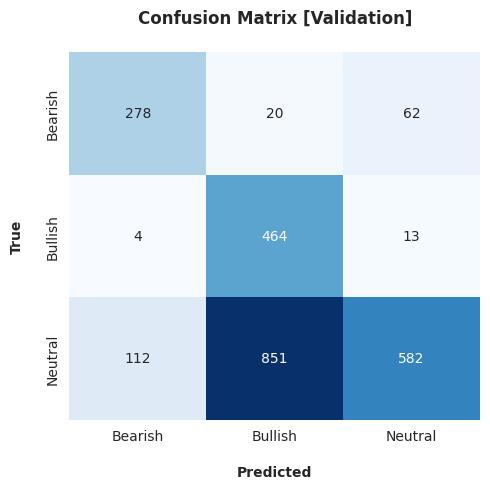

,Accuracy,Precision,Recall,F1 Score (Macro),AUROC
Phi-3-mini-4k-instruct | Original Text,0.55,0.65,0.7,0.59,N/A


In [26]:
# Convert string labels to numerical labels
Phi3_labels_to_numeric = {'Bearish': 0, 'Bullish': 1, 'Neutral': 2}
X_val['label_Phi3'] = X_val['label_Phi3_str'].map(Phi3_labels_to_numeric)
tweets_test_data['label_Phi3'] = tweets_test_data['label_Phi3_str'].map(Phi3_labels_to_numeric)

# Get the true labels for train and validation sets
y_pred_val_phi3 = X_val['label_Phi3'].values                                    # Validation predictions

# Calculate classification metrics only for validation set
Phi3_val_results = classification_metrics_validation_only(
    'Phi-3-mini-4k-instruct | Original Text',
    y_val, y_pred_val_phi3,
    execution_time_phi3,
    y_pred_val_proba=None,  # Phi-3-mini-4k-instruct does not provide probabilities
    classification_report_show=True
)

# Display validation results
display_side_by_side(
    pd.DataFrame(Phi3_val_results).T,
    super_title='Classification Metrics | Phi-3-mini-4k-instruct Classifier (Validation Only)',
    titles=['Validation Data']
)

In [27]:
# Save predictions to CSV (Validation and Test)
X_val[['text', 'label_Phi3_str']].to_csv('./validation_predictions_Phi3.csv', index=False)
tweets_test_data[['id', 'text', 'label_Phi3_str']].to_csv('./test_predictions_Phi3.csv', index=False)

In [28]:
# Save predictions to CSV (Test Set)
Phi3_predictions_df = pd.DataFrame({
    'id': tweets_test_data['id'],
    'label': tweets_test_data['label_Phi3']
})
Phi3_predictions_df.to_csv('./7_Phi3_TestPredictions.csv', index=False)

---